**Import required packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Read the data**

In [4]:
visa_df=pd.read_csv("C:\\Users\\ashux\\OneDrive\\Python Notes\\EDA\\EDA_large_data.csv")
visa_df.head()

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
0,1,56,Male,49770.79,27,East,New,2,20697.08,620,No,1400
1,2,49,Female,57777.86,35,South,VIP,2,24308.49,822,No,3624
2,3,50,Female,57966.19,82,South,VIP,2,29561.40,652,Yes,9523
3,4,33,Female,59555.88,30,North,VIP,2,22868.76,503,No,244
4,5,29,Male,60871.07,14,East,New,3,31972.05,454,Yes,375


In [5]:
visa_df.dtypes

ID                      int64
Age                     int64
Gender                 object
Income                float64
Spend_Score             int64
Region                 object
Customer_Type          object
Purchase_Frequency      int64
Savings               float64
Credit_Score            int64
Online_Shopping        object
Loyalty_Points          int64
dtype: object

$savings$

In [7]:
cs1=visa_df[["Credit_Score"]]
cs1.head()

,Credit_Score
0,620
1,822
2,652
3,503
4,454


- count
- max
- min
- mean
- median
- 25p
- 50p
- 75p

In [9]:
cs1.count()

Credit_Score    25000
dtype: int64

In [10]:
cs=visa_df["Credit_Score"]
cs.count()

25000

In [11]:
cs=visa_df["Credit_Score"]
cs_count=cs.count()
cs_mean=round(cs.mean())
cs_median=round(cs.median())
cs_max=cs.max()
cs_min=cs.min()
# print(cs_count)
# print(cs_mean)
# print(cs_median)
# print(cs_max)
# print(cs_min)

list1=[cs_count,cs_max,cs_min,cs_mean,cs_median]
index_list=['Count','Max','Min','Mean','Median']
pd.DataFrame(list1,
             columns=["Credit Score"],
             index=index_list)

,Credit Score
Count,25000
Max,849
Min,300
Mean,575
Median,575


In [12]:
# Numerical columns separately
num_cols=visa_df.select_dtypes(exclude='object').columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    mean=round(visa_df[i].mean())
    median=round(visa_df[i].median())
    maxx=visa_df[i].max()
    minn=visa_df[i].min()
    list1=[count,maxx,minn,mean,median]
    dict1[i]=list1

index_list=['Count','Max','Min','Mean','Median']
num_df=pd.DataFrame(dict1,
            index=index_list)
num_df.to_csv("num_df.csv")
num_df

,ID,Age,Income,Spend_Score,Purchase_Frequency,Savings,Credit_Score,Loyalty_Points
Count,25000,25000,25000.00,25000,25000,25000.00,25000,25000
Max,25000,69,111491.75,100,11,51595.02,849,9999
Min,1,18,-16981.75,1,0,-12646.66,300,100
Mean,12500,43,50101.00,50,3,20017.00,575,5062
Median,12500,43,50009.00,50,3,19965.00,575,5085


In [13]:
visa_df.describe()

,ID,Age,Income,Spend_Score,Purchase_Frequency,Savings,Credit_Score,Loyalty_Points
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000
mean,12500.500000,43.461520,50100.973172,50.278280,3.00824,20016.909269,574.638280,5062.395160
std,7217.022701,14.998931,14994.904557,28.907878,1.73031,8049.461042,159.058456,2861.325761
min,1.000000,18.000000,-16981.750000,1.000000,0.00000,-12646.660000,300.000000,100.000000
25%,6250.750000,31.000000,40047.470000,25.000000,2.00000,14672.375000,436.000000,2581.750000
50%,12500.500000,43.000000,50009.280000,50.000000,3.00000,19965.115000,575.000000,5085.000000
75%,18750.250000,56.000000,60118.745000,75.000000,4.00000,25447.467500,713.000000,7533.000000
max,25000.000000,69.000000,111491.750000,100.000000,11.00000,51595.020000,849.000000,9999.000000


In [14]:
cs=visa_df["Credit_Score"]
cs_count=cs.count()
cs_mean=round(cs.mean())
cs_median=round(cs.median())
cs_max=cs.max()
cs_min=cs.min()
cs_std=round(cs.std())

list1=[cs_count,cs_max,cs_min,cs_mean,cs_median,cs_std]
index_list=['Count','Max','Min','Mean','Median',"Std"]
pd.DataFrame(list1,
             columns=["Credit Score"],
             index=index_list)

,Credit Score
Count,25000
Max,849
Min,300
Mean,575
Median,575
Std,159


In [15]:
# Whatever calculations we did, we used pandas dataframe way
# The same we can achieve by numpy package also

In [16]:
# cs_mean=round(cs.mean()) === pandas
cs=visa_df["Credit_Score"]
print(np.mean(cs))
print(np.median(cs))
print(np.min(cs))                             # Using numpy
print(np.max(cs))
print(np.std(cs))

574.63828
575.0
300
849
159.05527441314575


**Percentile & Quantile**

- In the numpy package we have np.percentile() and np.quantile()

- Percentile: If you want 25p   --->  25

- Quantile:  q1-25p (0.25)    q2-50p (0.50)    q3-75p (0.75)

- Assume that a student got 120 marks and 95p

- 95% of students has marks below 120

In [18]:
np.percentile(cs,25)                         # We have to use between 0 to 100 (in percentile)

436.0

In [19]:
np.quantile(cs,0.25)                        # We have to use between 0 to 1 (in quantile)

436.0

In [20]:
cs=visa_df["Credit_Score"]

########################### Pandas ############################

cs_count=cs.count()
cs_mean=round(cs.mean())
cs_median=round(cs.median())
cs_max=cs.max()
cs_min=cs.min()
cs_std=round(cs.std())

########################### Numpy ########################

cs_25p=round(np.percentile(cs,25))
cs_50p=round(np.percentile(cs,50))
cs_75p=round(np.percentile(cs,75))

list1=[cs_count,cs_max,cs_min,cs_mean,cs_median,cs_std,cs_25p,cs_50p,cs_75p]
index_list=['Count','Max','Min','Mean','Median',"Std",'25%','50%','75%']
pd.DataFrame(list1,
             columns=["Credit Score"],
             index=index_list)

,Credit Score
Count,25000
Max,849
Min,300
Mean,575
Median,575
Std,159
25%,436
50%,575
75%,713


In [21]:
# Numerical columns separately
num_cols=visa_df.select_dtypes(exclude='object').columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    mean=round(visa_df[i].mean())
    median=round(visa_df[i].median())
    maxx=visa_df[i].max()
    minn=visa_df[i].min()
    std=visa_df[i].std()
    p25=round(np.percentile(visa_df[i],25),2)
    p50=round(np.percentile(visa_df[i],50),2)
    p75=round(np.percentile(visa_df[i],75),2)
    list1=[count,mean,median,maxx,minn,std,p25,p50,p75]
    dict1[i]=list1

index_list=['Count','Mean','Median','Max','Min','Std','25%','50%','75%']
num_df=pd.DataFrame(dict1,
            index=index_list)
num_df.to_csv("num_df.csv")
num_df

,ID,Age,Income,Spend_Score,Purchase_Frequency,Savings,Credit_Score,Loyalty_Points
Count,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000
Mean,12500.000000,43.000000,50101.000000,50.000000,3.00000,20017.000000,575.000000,5062.000000
Median,12500.000000,43.000000,50009.000000,50.000000,3.00000,19965.000000,575.000000,5085.000000
Max,25000.000000,69.000000,111491.750000,100.000000,11.00000,51595.020000,849.000000,9999.000000
Min,1.000000,18.000000,-16981.750000,1.000000,0.00000,-12646.660000,300.000000,100.000000
Std,7217.022701,14.998931,14994.904557,28.907878,1.73031,8049.461042,159.058456,2861.325761
25%,6250.750000,31.000000,40047.470000,25.000000,2.00000,14672.380000,436.000000,2581.750000
50%,12500.500000,43.000000,50009.280000,50.000000,3.00000,19965.110000,575.000000,5085.000000
75%,18750.250000,56.000000,60118.740000,75.000000,4.00000,25447.470000,713.000000,7533.000000


In [22]:
# Income 25p = 40047.47
# 25% of total employees has income below 40047.47
# 25*(25000)/100
# 6250 employees has income less than 40047.47

In [23]:
inc=visa_df['Income']

In [24]:
inc[inc<40047.47]

17       11256.32
18       36960.16
19       27334.50
21       39981.82
22       38129.65
           ...   
24982    22561.62
24983    24411.86
24991    39907.79
24994    27957.52
24999    30118.22
Name: Income, Length: 6250, dtype: float64

In [25]:
# Income 50p = 50009.280
# 50% of total employees has income below 50009.280
50*(25000)/100
# 12500 employees has income less than 40047.47

12500.0

In [26]:
inc[inc<50009.280]

0        49770.79
7        41603.15
9        43099.04
11       49698.66
17       11256.32
           ...   
24994    27957.52
24995    47428.10
24997    48966.95
24998    49105.76
24999    30118.22
Name: Income, Length: 12500, dtype: float64

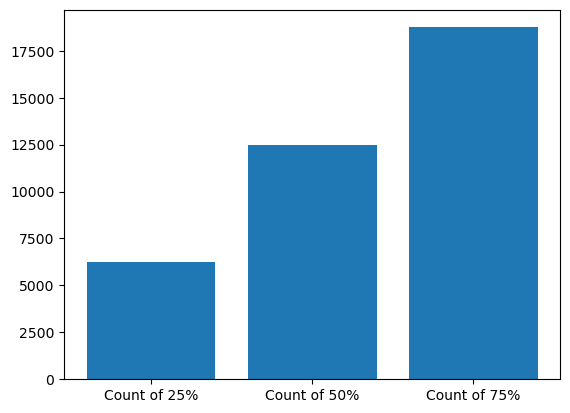

In [27]:
inc=visa_df['Income']
count25p=len(inc[inc<np.percentile(inc,25)])
count50p=len(inc[inc<np.percentile(inc,50)])
count75p=len(inc[inc<np.percentile(inc,75)])

l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[count25p,count50p,count75p]
d1=pd.DataFrame(zip(l1,l2),columns=['Till per','Count'])
plt.bar('Till per','Count',data=d1)
plt.show()

In [28]:
#Q) You want to extract a dataframe
#Q) Which has income less than 40047.47(25p)


# Step-1: TAke the reference column first
inc=visa_df['Income']

# Step-2: Apply the condition --- It will provide True or False
condition=inc<40047.47

# Step-3: Apply the original dataframe on top of that so that it will give only True values
visa_df[condition]

## OR ##

visa_df[visa_df['Income']<40047.47]

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
17,18,19,Male,11256.32,13,South,New,1,21125.72,609,No,8759
18,19,44,Female,36960.16,48,North,Returning,5,20975.13,549,Yes,7941
19,20,26,Female,27334.50,13,West,Returning,3,16273.22,602,Yes,2119
21,22,28,Male,39981.82,93,South,Returning,1,18540.91,495,No,5358
22,23,20,Male,38129.65,33,South,Returning,5,23940.00,637,No,3214
...,...,...,...,...,...,...,...,...,...,...,...,...
24982,24983,23,Male,22561.62,84,North,VIP,5,10132.02,609,No,9147
24983,24984,50,Male,24411.86,56,East,Returning,3,26907.88,704,Yes,6378
24991,24992,57,Male,39907.79,18,South,New,1,16461.11,703,No,125
24994,24995,47,Female,27957.52,5,West,VIP,1,14628.72,742,No,3073


In [29]:
# 50p
visa_df[visa_df['Income']<np.percentile(visa_df['Income'],50)]

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
0,1,56,Male,49770.79,27,East,New,2,20697.08,620,No,1400
7,8,51,Male,41603.15,84,East,VIP,4,8040.37,428,Yes,9826
9,10,53,Female,43099.04,7,South,Returning,2,21223.98,622,Yes,2430
11,12,40,Female,49698.66,100,West,VIP,4,21016.74,422,No,3547
17,18,19,Male,11256.32,13,South,New,1,21125.72,609,No,8759
...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,47,Female,27957.52,5,West,VIP,1,14628.72,742,No,3073
24995,24996,42,Male,47428.10,95,East,Returning,4,19250.61,429,No,3504
24997,24998,60,Male,48966.95,41,South,VIP,1,5739.21,497,Yes,5832
24998,24999,30,Female,49105.76,85,South,Returning,4,9281.24,729,No,4737


In [30]:
# Between 25p and 50p

inc=visa_df['Income']
p_25=np.percentile(inc,25)
p_50=np.percentile(inc,50)

cond1=inc>p_25
cond2=inc<p_50

visa_df[cond1&cond2]

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
0,1,56,Male,49770.79,27,East,New,2,20697.08,620,No,1400
7,8,51,Male,41603.15,84,East,VIP,4,8040.37,428,Yes,9826
9,10,53,Female,43099.04,7,South,Returning,2,21223.98,622,Yes,2430
11,12,40,Female,49698.66,100,West,VIP,4,21016.74,422,No,3547
20,21,18,Female,43919.61,87,South,New,3,8088.43,670,Yes,4393
...,...,...,...,...,...,...,...,...,...,...,...,...
24990,24991,27,Female,41550.57,20,East,VIP,6,34400.37,505,Yes,7284
24993,24994,29,Male,40687.46,27,West,Returning,2,18577.76,437,No,2046
24995,24996,42,Male,47428.10,95,East,Returning,4,19250.61,429,No,3504
24997,24998,60,Male,48966.95,41,South,VIP,1,5739.21,497,Yes,5832


In [31]:
# Less than 25p and more than 75p

inc=visa_df['Income']
p_25=np.percentile(inc,25)
p_75=np.percentile(inc,75)

con1=inc<p_25
con2=inc>p_75

visa_df[con1 | con2]

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
4,5,29,Male,60871.07,14,East,New,3,31972.05,454,Yes,375
6,7,69,Female,60843.35,34,South,Returning,1,31211.60,439,No,9302
8,9,31,Male,67645.38,15,North,VIP,1,26293.46,670,Yes,6429
10,11,50,Male,67354.32,13,West,VIP,3,14113.28,760,No,8816
13,14,62,Male,63232.06,60,East,Returning,2,4461.11,680,Yes,642
...,...,...,...,...,...,...,...,...,...,...,...,...
24991,24992,57,Male,39907.79,18,South,New,1,16461.11,703,No,125
24992,24993,24,Male,71043.84,72,North,New,1,16010.66,787,Yes,6903
24994,24995,47,Female,27957.52,5,West,VIP,1,14628.72,742,No,3073
24996,24997,45,Male,73364.48,46,East,Returning,2,26113.03,555,No,148


# Histogram

- From raw data will make class intervals

- Will count the observations in each class intervals

- Frequency distribution table

- Plot of Frequency distribution table is Histogran

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 9.000e+00,
        2.100e+01, 2.800e+01, 6.300e+01, 1.070e+02, 1.680e+02, 3.220e+02,
        4.460e+02, 5.840e+02, 8.120e+02, 1.084e+03, 1.418e+03, 1.617e+03,
        1.910e+03, 2.032e+03, 2.193e+03, 2.080e+03, 1.989e+03, 1.852e+03,
        1.520e+03, 1.324e+03, 1.020e+03, 7.710e+02, 5.950e+02, 3.760e+02,
        2.660e+02, 1.680e+02, 9.200e+01, 5.400e+01, 3.400e+01, 1.800e+01,
        1.400e+01, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([-16981.75  , -13769.9125, -10558.075 ,  -7346.2375,  -4134.4   ,
          -922.5625,   2289.275 ,   5501.1125,   8712.95  ,  11924.7875,
         15136.625 ,  18348.4625,  21560.3   ,  24772.1375,  27983.975 ,
         31195.8125,  34407.65  ,  37619.4875,  40831.325 ,  44043.1625,
         47255.    ,  50466.8375,  53678.675 ,  56890.5125,  60102.35  ,
         63314.1875,  66526.025 ,  69737.8625,  72949.7   ,  76161.5375,
         79373.375 ,  82585.2125,  85797.05  ,  89008.8875,  922

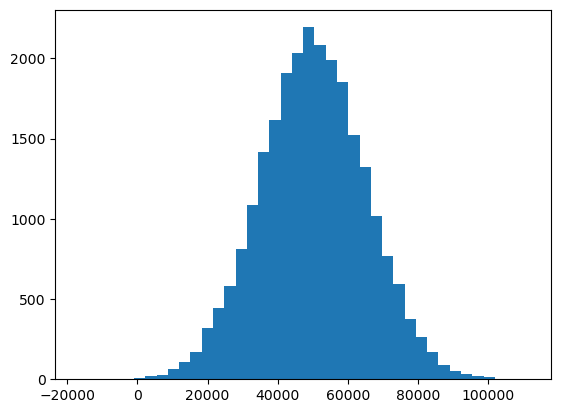

In [34]:
inc=visa_df['Income']
freq,interval,n=plt.hist(inc,bins=40)
freq,interval

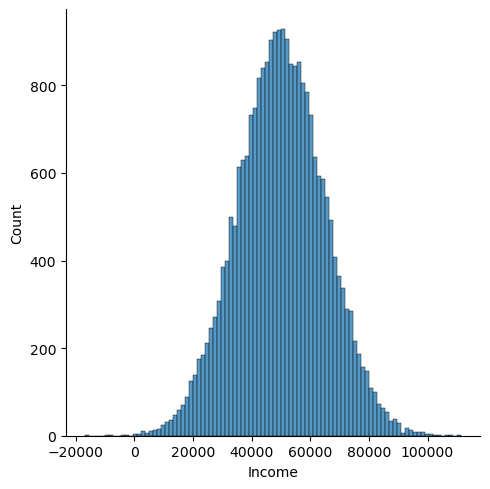

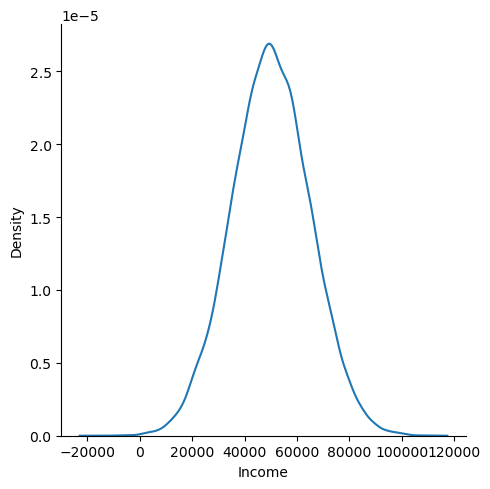

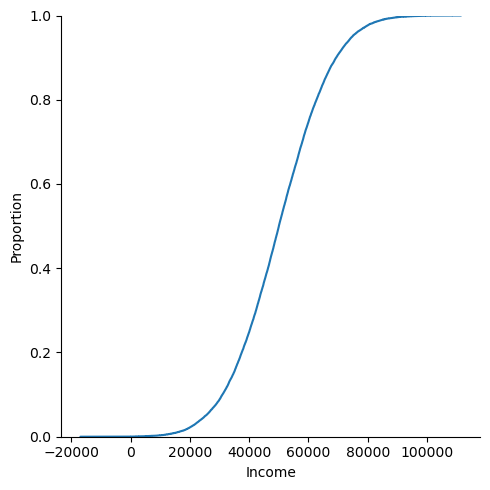

In [154]:
sns.displot(visa_df["Income"])
# kind = "hist" (by default) Histogram

sns.displot(visa_df["Income"],kind='kde')
# kde = kernal density estimation

sns.displot(visa_df["Income"],kind='ecdf')
# ecdf = Cumulative distribution plot

(array([  13.,  167., 1016., 3590., 7045., 7333., 4247., 1336.,  228.,
          25.]),
 array([-12646.66 ,  -6222.492,    201.676,   6625.844,  13050.012,
         19474.18 ,  25898.348,  32322.516,  38746.684,  45170.852,
         51595.02 ]),
 <BarContainer object of 10 artists>)

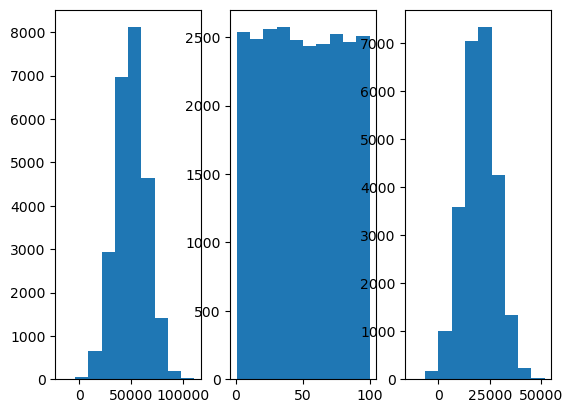

In [179]:
plt.subplot(1,3,1)                           # 1 row 3 columns
plt.hist(visa_df["Income"])
plt.subplot(1,3,2)
plt.hist(visa_df["Spend_Score"])
plt.subplot(1,3,3)
plt.hist(visa_df["Savings"])